In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
kkk = 1

In [2]:
def g(x):
    n = 15
    m = 10
    return (x - 1) * np.exp(-m * x) + x**n

def g_der(x):
    return np.exp(-10*x) * (15 * np.exp(10*x) * x**14 - 10 * x + 11)

a = -1
b = 0.8

In [3]:
def fun_painter(func:list, names:list, points = None, title=None, start=a, end=b):
    global kkk
    plt.figure()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    for i in range(len(func)):
        x = np.linspace(start, end, 1000)
        y = func[i](x)
        plt.plot(x, y, label=names[i])
    plt.legend()
    if title is not None:
        plt.title(title)
    if points is not None:
        plt.plot(points[0], points[1], marker='o', linestyle='')
    name = "obrazek" + str(kkk) + ".png"
    name = "f(x)"
    plt.savefig(name,bbox_inches='tight')
    kkk+=1
    plt.show()

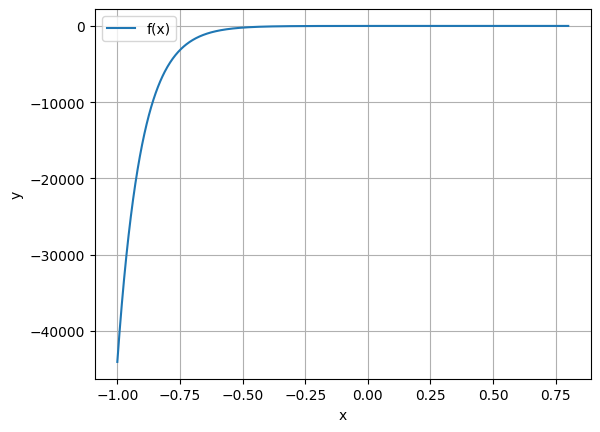

In [4]:
fun_painter([g],["f(x)"])

In [5]:
def newton(eps, start=a, f = g, f_der = g_der, s=1):
    i = 0
    x_i_old = start
    x_i = x_i_old - f(x_i_old)/f_der(x_i_old)
    while True:
        i += 1
        if (s == 1 and abs(x_i - x_i_old) < eps) or (s == 2 and abs(f(x_i)) < eps):
            break

        x_i_old = x_i
        x_i = x_i_old - f(x_i_old) / f_der(x_i_old)
    return i, x_i

In [6]:
def sieczne(eps, f=g ,s=1, start=a, end=b):
    x_0 = start
    x_1 = end
    x_2 = x_1 - (x_1-x_0)/(f(x_1)-f(x_0)) * f(x_1)
    i = 0
    while True:
        i += 1
        if (s == 1 and abs(x_2 - x_1) < eps) or (s == 2 and abs(f(x_2)) < eps):
            break
        x_0 = x_1
        x_1 = x_2
        x_2 = x_1 - (x_1-x_0)/(f(x_1)-f(x_0)) * f(x_1)
    return i, x_2

In [7]:
def generate_tables(s=1):
    epsilons = [0.01, 0.001, 0.0001, 1e-5, 1e-8, 1e-12, 1e-15]
    starts = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

    header = "\\noindent\\begin{minipage}{\\linewidth}\n\\centering\n"
    header += "\\captionof{table}{Porównanie liczby iteracji i wartości przybliżenia " \
              "korzenia dla różnych wartości startowych i $\epsilon$}\label{tab:merged-table}\n"
    iterations_table = header + "\\begin{tabular}{|c|" + "c|"*len(epsilons) + "}\n\\hline\n"
    values_table = header + "\\begin{tabular}{|c|" + "c|"*len(epsilons) + "}\n\\hline\n"

    iterations_table += "Start & \\multicolumn{" + str(len(epsilons)) + "}{c|}{$\\epsilon$} \\\\\n\\cline{2-" + str(len(epsilons)+1) + "}\n"
    values_table += "Start & \\multicolumn{" + str(len(epsilons)) + "}{c|}{$\\epsilon$} \\\\\n\\cline{2-" + str(len(epsilons)+1) + "}\n"

    iterations_table += " & " + " & ".join([f"{eps}" for eps in epsilons]) + " \\\\\n\\hline\n"
    values_table += " & " + " & ".join([f"{eps}" for eps in epsilons]) + " \\\\\n\\hline\n"

    for start in starts:
        iterations_table += f"{start:.1f}"
        values_table += f"{start:.1f}"
        for eps in epsilons:
            i, x_i = newton(eps, start=start, s=s)
            iterations_table += f" & {i}"
            values_table += f" & {x_i:.10f}"
        iterations_table += " \\\\\n\\hline\n"
        values_table += " \\\\\n\\hline\n"

    iterations_table += "\\end{tabular}\n\\end{minipage}\n"
    values_table += "\\end{tabular}\n\\end{minipage}\n"

    return iterations_table, values_table

In [8]:
iterations_table, values_table = generate_tables()

print("Iterations Table LaTeX Code:\n")
print(iterations_table)
print("\nValues Table LaTeX Code:\n")
print(values_table)

Iterations Table LaTeX Code:

\noindent\begin{minipage}{\linewidth}
\centering
\captionof{table}{Porównanie liczby iteracji i wartości przybliżenia korzenia dla różnych wartości startowych i $\epsilon$}\label{tab:merged-table}
\begin{tabular}{|c|c|c|c|c|c|c|c|}
\hline
Start & \multicolumn{7}{c|}{$\epsilon$} \\
\cline{2-8}
 & 0.01 & 0.001 & 0.0001 & 1e-05 & 1e-08 & 1e-12 & 1e-15 \\
\hline
-1.0 & 19 & 20 & 20 & 21 & 21 & 22 & 22 \\
\hline
-0.9 & 18 & 18 & 19 & 19 & 20 & 21 & 21 \\
\hline
-0.8 & 17 & 17 & 18 & 18 & 19 & 20 & 20 \\
\hline
-0.7 & 16 & 17 & 17 & 18 & 18 & 19 & 19 \\
\hline
-0.6 & 15 & 16 & 16 & 17 & 17 & 18 & 18 \\
\hline
-0.5 & 14 & 15 & 15 & 16 & 16 & 17 & 17 \\
\hline
-0.4 & 13 & 14 & 14 & 15 & 16 & 16 & 16 \\
\hline
-0.3 & 12 & 13 & 13 & 14 & 14 & 15 & 15 \\
\hline
-0.2 & 11 & 12 & 12 & 13 & 13 & 14 & 14 \\
\hline
-0.1 & 10 & 11 & 11 & 12 & 12 & 13 & 13 \\
\hline
0.0 & 9 & 10 & 10 & 10 & 11 & 12 & 12 \\
\hline
0.1 & 8 & 8 & 9 & 9 & 10 & 11 & 11 \\
\hline
0.2 & 6 & 7 & 8 

In [9]:
iterations_table, values_table = generate_tables(2)

print("Iterations Table LaTeX Code:\n")
print(iterations_table)
print("\nValues Table LaTeX Code:\n")
print(values_table)

Iterations Table LaTeX Code:

\noindent\begin{minipage}{\linewidth}
\centering
\captionof{table}{Porównanie liczby iteracji i wartości przybliżenia korzenia dla różnych wartości startowych i $\epsilon$}\label{tab:merged-table}
\begin{tabular}{|c|c|c|c|c|c|c|c|}
\hline
Start & \multicolumn{7}{c|}{$\epsilon$} \\
\cline{2-8}
 & 0.01 & 0.001 & 0.0001 & 1e-05 & 1e-08 & 1e-12 & 1e-15 \\
\hline
-1.0 & 16 & 18 & 18 & 19 & 20 & 21 & 21 \\
\hline
-0.9 & 15 & 17 & 17 & 18 & 19 & 19 & 20 \\
\hline
-0.8 & 14 & 16 & 16 & 17 & 18 & 19 & 19 \\
\hline
-0.7 & 13 & 15 & 15 & 16 & 17 & 18 & 18 \\
\hline
-0.6 & 12 & 14 & 14 & 15 & 16 & 17 & 17 \\
\hline
-0.5 & 10 & 13 & 13 & 14 & 15 & 16 & 16 \\
\hline
-0.4 & 9 & 11 & 12 & 13 & 14 & 15 & 15 \\
\hline
-0.3 & 8 & 10 & 11 & 12 & 13 & 14 & 14 \\
\hline
-0.2 & 7 & 9 & 10 & 11 & 12 & 13 & 13 \\
\hline
-0.1 & 6 & 8 & 9 & 10 & 11 & 12 & 12 \\
\hline
0.0 & 5 & 7 & 8 & 9 & 10 & 11 & 11 \\
\hline
0.1 & 4 & 6 & 7 & 8 & 9 & 9 & 10 \\
\hline
0.2 & 3 & 5 & 6 & 6 & 7 & 8 

In [10]:
def generate_secant_tables(s=1):
    epsilons = [0.01, 0.001, 0.0001, 1e-5, 1e-8, 1e-12, 1e-15]

    starts_ends_1 = [(-1.0, 0.8), (-0.9, 0.8), (-0.8, 0.8), (-0.7, 0.8), (-0.6, 0.8), (-0.5, 0.8),
                     (-0.4, 0.8), (-0.3, 0.8), (-0.2, 0.8), (-0.1, 0.8), (0.0, 0.8), (0.1, 0.8),
                     (0.2, 0.8), (0.3, 0.8), (0.4, 0.8), (0.5, 0.8), (0.6, 0.8), (0.7, 0.8)]
    starts_ends_2 = [(-1.0, 0.8), (-1.0, 0.7), (-1.0, 0.6), (-1.0, 0.5), (-1.0, 0.4), (-1.0, 0.3),
                     (-1.0, 0.2), (-1.0, 0.1), (-1.0, 0.0), (-1.0, -0.1), (-1.0, -0.2), (-1.0, -0.3),
                     (-1.0, -0.4), (-1.0, -0.5), (-1.0, -0.6), (-1.0, -0.7), (-1.0, -0.8), (-1.0, -0.9)]

    header = "\\noindent\\begin{minipage}{\\linewidth}\n\\centering\n"
    header += "\\captionof{table}{Porównanie liczby iteracji i wartości przybliżenia " \
              "korzenia dla różnych wartości startowych i $\epsilon$}\label{tab:merged-table}\n"
    table_template = header + "\\begin{tabular}{|c|" + "c|"*len(epsilons) + "}\n\\hline\n"

    def generate_table(start_end_pairs):
        iterations_table = table_template
        values_table = table_template

        iterations_table += "Start & \\multicolumn{" + str(len(epsilons)) + "}{c|}{$\\epsilon$} \\\\\n\\cline{2-" + str(len(epsilons)+1) + "}\n"
        values_table += "Start & \\multicolumn{" + str(len(epsilons)) + "}{c|}{$\\epsilon$} \\\\\n\\cline{2-" + str(len(epsilons)+1) + "}\n"

        iterations_table += " & " + " & ".join([f"{eps}" for eps in epsilons]) + " \\\\\n\\hline\n"
        values_table += " & " + " & ".join([f"{eps}" for eps in epsilons]) + " \\\\\n\\hline\n"

        for start, end in start_end_pairs:
            iterations_table += f"({start:.1f}, {end:.1f})"
            values_table += f"({start:.1f}, {end:.1f})"
            for eps in epsilons:
                i, x_i = sieczne(eps, start=start, end=end, s=s)
                iterations_table += f" & {i}"
                values_table += f" & {x_i:.10f}"
            iterations_table += " \\\\\n\\hline\n"
            values_table += " \\\\\n\\hline\n"

        iterations_table += "\\end{tabular}\n\\end{minipage}\n"
        values_table += "\\end{tabular}\n\\end{minipage}\n"

        return iterations_table, values_table

    tables1_iterations, tables1_values = generate_table(starts_ends_1)
    tables2_iterations, tables2_values = generate_table(starts_ends_2)

    return tables1_iterations, tables1_values, tables2_iterations, tables2_values

In [11]:
tables1_iterations, tables1_values, tables2_iterations, tables2_values = generate_secant_tables()

print(tables1_iterations)
print(tables1_values)
print(tables2_iterations)
print(tables2_values)

\noindent\begin{minipage}{\linewidth}
\centering
\captionof{table}{Porównanie liczby iteracji i wartości przybliżenia korzenia dla różnych wartości startowych i $\epsilon$}\label{tab:merged-table}
\begin{tabular}{|c|c|c|c|c|c|c|c|}
\hline
Start & \multicolumn{7}{c|}{$\epsilon$} \\
\cline{2-8}
 & 0.01 & 0.001 & 0.0001 & 1e-05 & 1e-08 & 1e-12 & 1e-15 \\
\hline
(-1.0, 0.8) & 1 & 1 & 1 & 1 & 11 & 12 & 13 \\
\hline
(-0.9, 0.8) & 1 & 1 & 1 & 1 & 11 & 12 & 13 \\
\hline
(-0.8, 0.8) & 1 & 1 & 1 & 10 & 11 & 12 & 13 \\
\hline
(-0.7, 0.8) & 1 & 1 & 1 & 10 & 11 & 12 & 13 \\
\hline
(-0.6, 0.8) & 1 & 1 & 1 & 10 & 11 & 12 & 13 \\
\hline
(-0.5, 0.8) & 1 & 1 & 10 & 10 & 11 & 12 & 13 \\
\hline
(-0.4, 0.8) & 1 & 1 & 10 & 10 & 11 & 12 & 13 \\
\hline
(-0.3, 0.8) & 1 & 9 & 10 & 10 & 11 & 12 & 13 \\
\hline
(-0.2, 0.8) & 1 & 9 & 10 & 10 & 11 & 12 & 13 \\
\hline
(-0.1, 0.8) & 7 & 9 & 10 & 10 & 11 & 12 & 13 \\
\hline
(0.0, 0.8) & 7 & 9 & 9 & 10 & 11 & 12 & 12 \\
\hline
(0.1, 0.8) & 6 & 8 & 8 & 9 & 10 & 11 & 12 \

In [12]:
tables1_iterations, tables1_values, tables2_iterations, tables2_values = generate_secant_tables(2)

print(tables1_iterations)
print(tables1_values)
print(tables2_iterations)
print(tables2_values)

\noindent\begin{minipage}{\linewidth}
\centering
\captionof{table}{Porównanie liczby iteracji i wartości przybliżenia korzenia dla różnych wartości startowych i $\epsilon$}\label{tab:merged-table}
\begin{tabular}{|c|c|c|c|c|c|c|c|}
\hline
Start & \multicolumn{7}{c|}{$\epsilon$} \\
\cline{2-8}
 & 0.01 & 0.001 & 0.0001 & 1e-05 & 1e-08 & 1e-12 & 1e-15 \\
\hline
(-1.0, 0.8) & 3 & 6 & 7 & 8 & 10 & 11 & 12 \\
\hline
(-0.9, 0.8) & 3 & 6 & 7 & 8 & 10 & 11 & 12 \\
\hline
(-0.8, 0.8) & 3 & 6 & 7 & 8 & 10 & 11 & 12 \\
\hline
(-0.7, 0.8) & 3 & 6 & 7 & 8 & 10 & 11 & 12 \\
\hline
(-0.6, 0.8) & 3 & 6 & 7 & 8 & 10 & 11 & 12 \\
\hline
(-0.5, 0.8) & 3 & 6 & 7 & 8 & 10 & 11 & 12 \\
\hline
(-0.4, 0.8) & 3 & 6 & 7 & 8 & 10 & 11 & 12 \\
\hline
(-0.3, 0.8) & 3 & 6 & 7 & 8 & 10 & 11 & 12 \\
\hline
(-0.2, 0.8) & 3 & 6 & 7 & 8 & 10 & 11 & 12 \\
\hline
(-0.1, 0.8) & 3 & 6 & 7 & 8 & 10 & 11 & 11 \\
\hline
(0.0, 0.8) & 2 & 5 & 7 & 8 & 9 & 11 & 11 \\
\hline
(0.1, 0.8) & 1 & 4 & 6 & 7 & 9 & 10 & 10 \\
\hline
(0.2, 0

In [13]:
arr = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
epsilons = [0.01, 0.001, 0.0001, 1e-5, 1e-8, 1e-12, 1e-15]
starts_ends_1 = [(-1.0, 0.8), (-0.9, 0.8), (-0.8, 0.8), (-0.7, 0.8), (-0.6, 0.8), (-0.5, 0.8),
                 (-0.4, 0.8), (-0.3, 0.8), (-0.2, 0.8), (-0.1, 0.8), (0.0, 0.8), (0.1, 0.8),
                 (0.2, 0.8), (0.3, 0.8), (0.4, 0.8), (0.5, 0.8), (0.6, 0.8), (0.7, 0.8)]
starts_ends_2 = [(-1.0, 0.8), (-1.0, 0.7), (-1.0, 0.6), (-1.0, 0.5), (-1.0, 0.4), (-1.0, 0.3),
                 (-1.0, 0.2), (-1.0, 0.1), (-1.0, 0.0), (-1.0, -0.1), (-1.0, -0.2), (-1.0, -0.3),
                 (-1.0, -0.4), (-1.0, -0.5), (-1.0, -0.6), (-1.0, -0.7), (-1.0, -0.8), (-1.0, -0.9)]
xd = 0.6200801922840920102396355570603485380356196221665376910461711884474687441456944277827074383069606845512241225403330693846296453066955944017544375150298135247777
def generate_matrix(method, s=1, ww=1):
    if method == "newton":
        matrix = np.zeros((len(arr), len(epsilons)))
    
        for i, start in enumerate(arr):
            for j, eps in enumerate(epsilons):
                r = newton(eps, start=start, s=s)
                w = abs(r[1] - xd)
                matrix[i, j] = w
    else:
        matrix = np.zeros((len(starts_ends_1), len(epsilons)))
        
        if ww == 1:
            for i, start in enumerate(starts_ends_1):
                for j, eps in enumerate(epsilons):
                    r = sieczne(eps, start = starts_ends_1[i][0], end = starts_ends_1[i][1], s=s)
                    w = abs(r[1] - xd)
                    matrix[i][j] = w
        else:
            for i, start in enumerate(starts_ends_2):
                for j, eps in enumerate(epsilons):
                    r = sieczne(eps, start = starts_ends_2[i][0], end = starts_ends_2[i][1], s=s)
                    w = abs(r[1] - xd)
                    matrix[i][j] = w
    return matrix

In [14]:
def generate_heat_map(s=1, method='newton', w=1):
    global kkk
    data = generate_matrix(s=s, method=method, ww=w)
    plt.figure(figsize=(12, 10))
    # Tworzenie heatmapy
    plt.imshow(data, cmap='Reds', interpolation='nearest', aspect='auto', norm=LogNorm())
    
    
    
    # Dodanie paska kolorów
    plt.colorbar()
    
    # Dodanie opisów osi
    plt.xlabel('ρ')
    plt.ylabel(r'$x_i$')
    
    
    # Opcjonalne: Dodanie etykiet do osi X i Y
    x_labels = [0.01, 0.001, 0.0001, 1e-5, 1e-8, 1e-12, 1e-15]
    if method == 'newton':
        y_labels = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
        name = "Wartości błędów - metoda Newtona"
    elif method == 'sieczne' and w == 1:
        y_labels = starts_ends_1
        name = "Wartości błędów - metoda siecznych - stały koniec przedziału"
        plt.ylabel(r'$(x_0,x_1)$')
    else:
        y_labels = starts_ends_2
        name = "Wartości błędów - metoda siecznych - stały początek przedziału"
        plt.ylabel(r'$(x_0,x_1)$')
        
    if s == 1:
        name += " - 1. kryterium stopu"
    else:
        name += " - 2. kryterium stopu"
        
    plt.title(name)
    plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels)
    plt.yticks(ticks=np.arange(len(y_labels)), labels=y_labels)

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            plt.text(j, i, f'{data[i, j]:.5e}', ha='center', va='center', color='black')

    name = "heatmap" + str(kkk) + ".png"
    kkk += 1
    plt.savefig(name,bbox_inches='tight')
    # Wyświetlenie heatmapy
    plt.show()

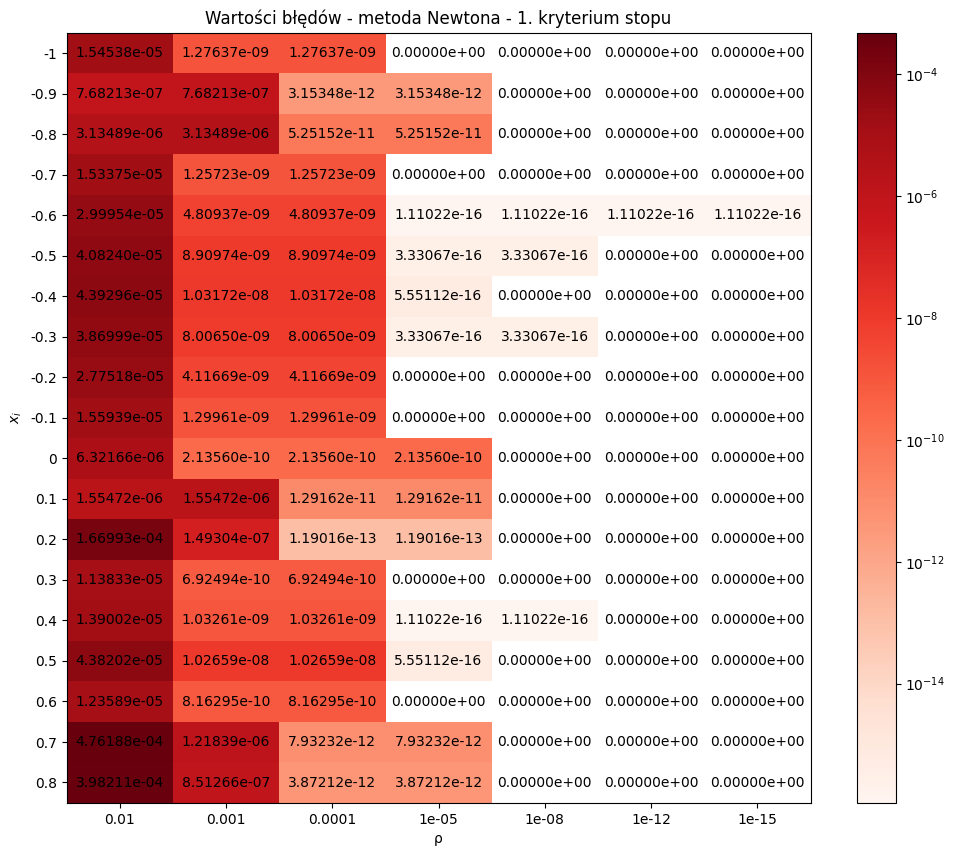

In [15]:
generate_heat_map(method="newton", s=1)

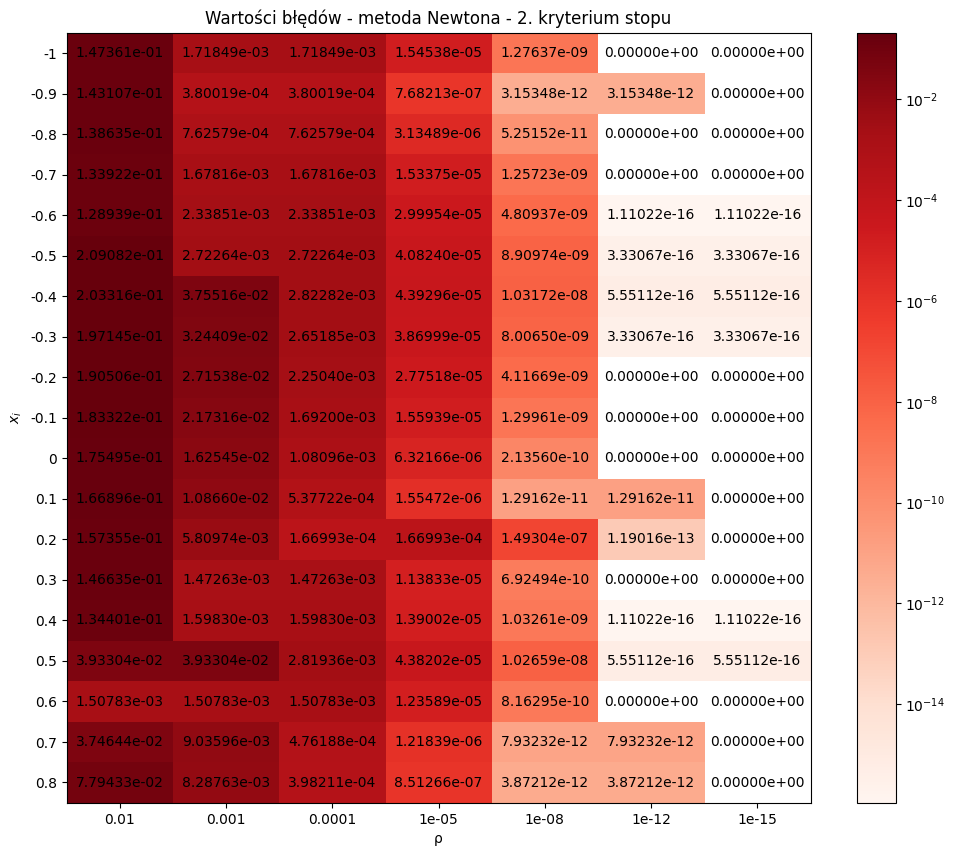

In [16]:
generate_heat_map(method="newton", s=2)

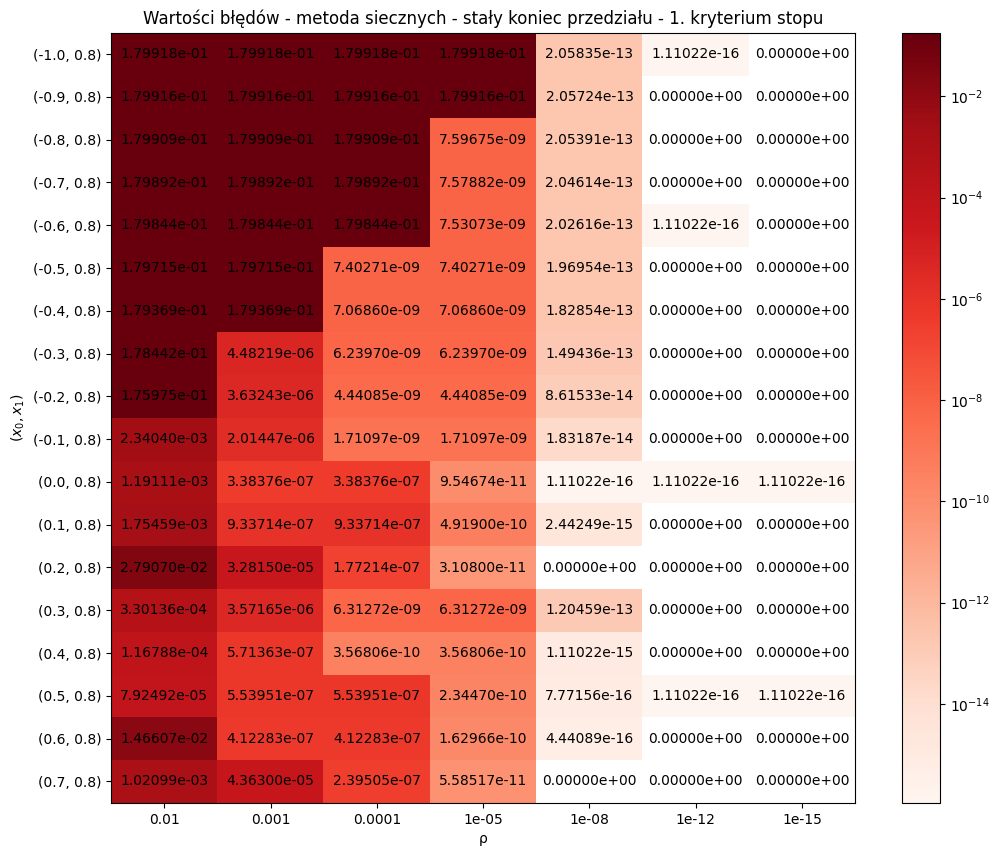

In [17]:
generate_heat_map(method="sieczne", s=1, w=1)

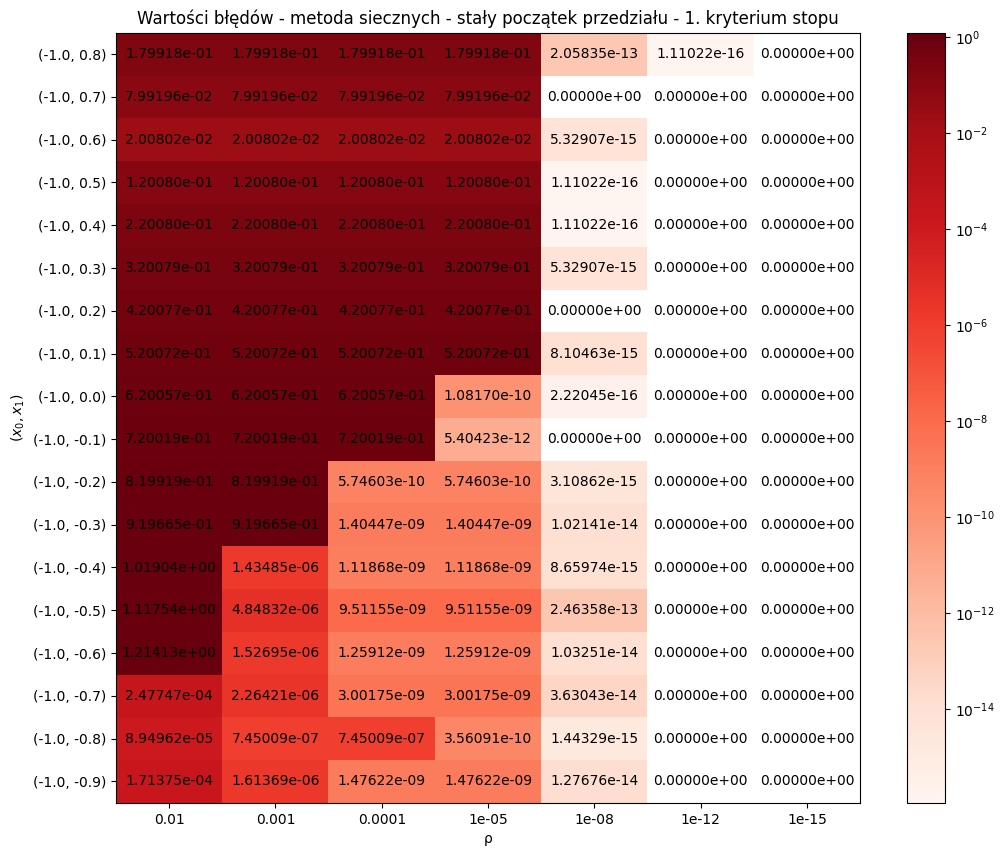

In [18]:
generate_heat_map(method="sieczne", s=1, w=2)

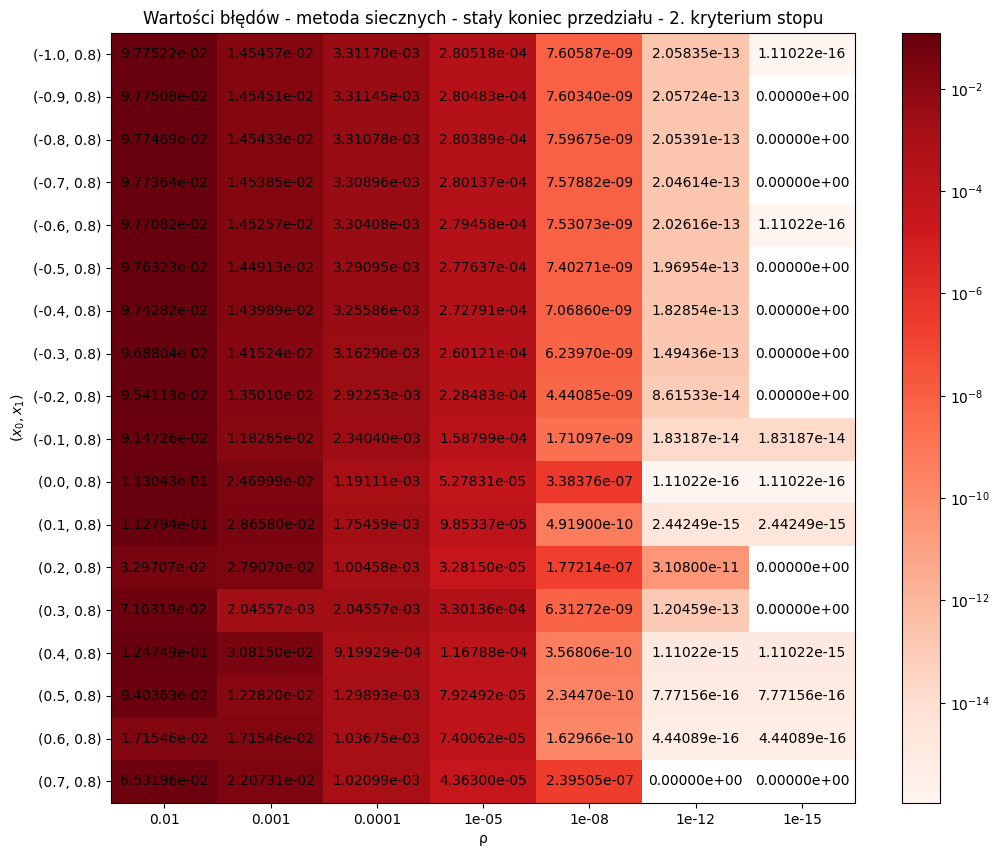

In [19]:
generate_heat_map(method="sieczne", s=2, w=1)

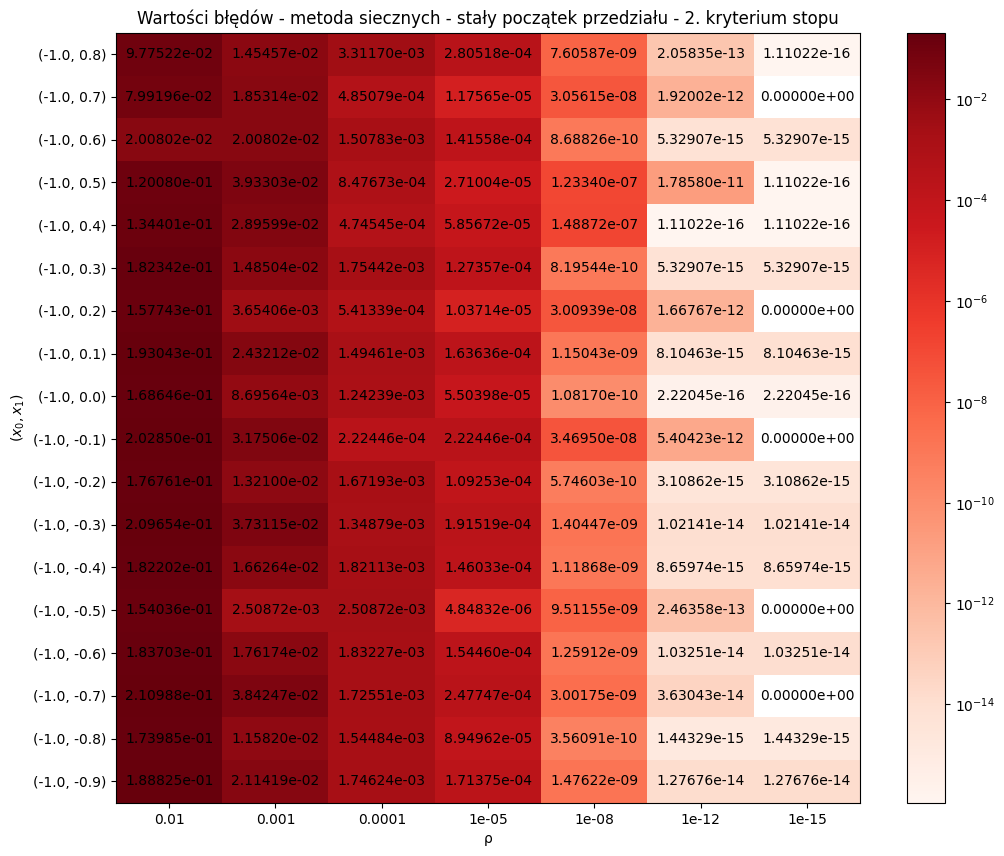

In [20]:
generate_heat_map(method="sieczne", s=2, w=2)